<a href="https://colab.research.google.com/github/daniel-usp/MachineLearning/blob/main/RANDOM_FOREST_FIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = green> Projeto com Random Forest



In [ ]:
install.packages('rpart',dependencies=T)
install.packages("rpart.plot")
install.packages("readxl")
library(rpart)
library(rpart.plot)
library(readxl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 0.8947368

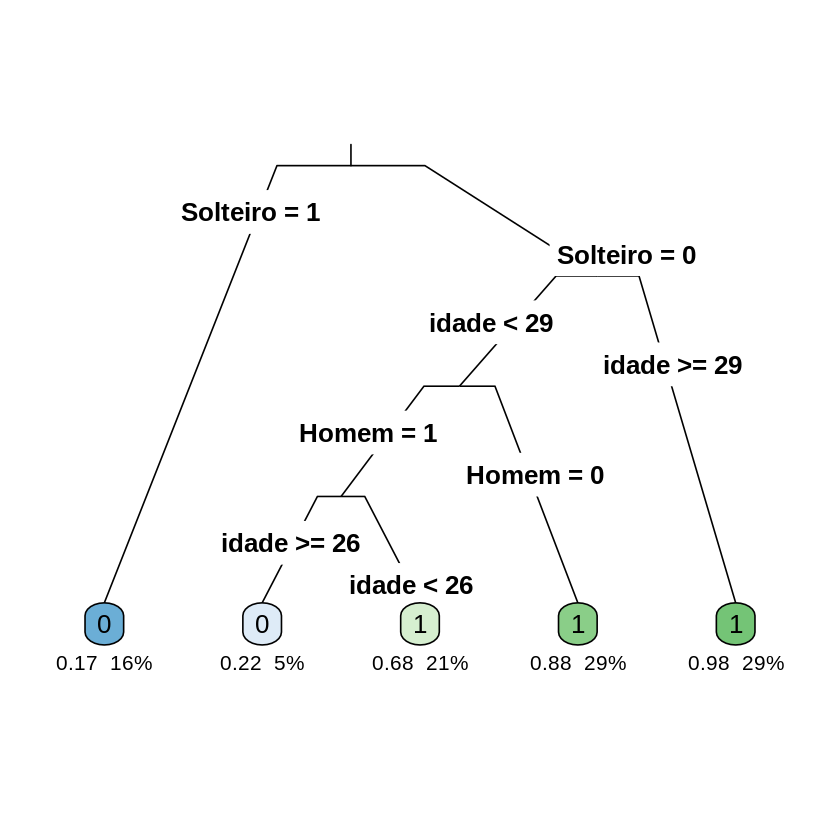

In [ ]:
## Prof. Daniel Bergmann - Random Forest
## Importar o Banco de Dados

## Renomear o y com a variável dependente do Banco de Dados
## Declarar a coluna que se encontra a variável Y
dados = read_excel("pagamento.xlsx")
coluna_Y = 1

names(dados)[coluna_Y] <- c("Y")
# Amostra aletória
set.seed(120)

#Amostra treino e teste
amostra = sample(2,nrow(dados),replace=T, prob=c(0.8,0.2)) #Selecionar duas amostras
dados_treino = dados[amostra==1,] #Amostra Treino
dados_teste = dados[amostra==2,]  #Amostra Teste


#Modelo
arvore = rpart(Y ~., data=dados,  method="class") #Rodar a arvore de decisao
Prob_Ser_1 = predict(arvore,newdata= dados_teste) #Calcular as probabilidade
dados_final = cbind(dados_teste,Prob_Ser_1) #Agrupar em dados final
dados_final['Result'] = ifelse(dados_final$`0` >= 0.5,0,1) #Colocar as probabilidades no banco de dados

confusao = table(dados_final$Y,dados_final$Result) #calcular a matriz de confusao e a taxa de acerto
taxaacerto = (confusao[1] + confusao[4]) / sum(confusao)
taxaacerto

#A função tweak muda o tamanho do texto dentro da arvore. O valor de de 1.4 indica um aumento de 40 por cento
rpart.plot(arvore, type = 3, clip.right.labs = FALSE, tweak=1.3, branch = .3, under = TRUE)


In [ ]:
rpart.rules(arvore,cover=TRUE)

,Y,,,,,,,,,,,,,,,,,cover
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
4,0.08,when,temp_cli,>=,,,19,&,fatura,<,1384,,,,,,,44%
114,0.18,when,temp_cli,<,19,,,&,fatura,is,860,to,910,&,idade,<,33,1%
10,0.24,when,temp_cli,>=,,,26,&,fatura,>=,,,1384,,,,,6%
6,0.26,when,temp_cli,<,19,,,&,fatura,<,749,,,,,,,34%
56,0.38,when,temp_cli,<,19,,,&,fatura,is,860,to,1225,&,idade,>=,33,4%
11,0.63,when,temp_cli,is,19,to,26,&,fatura,>=,,,1384,,,,,3%
29,0.64,when,temp_cli,<,19,,,&,fatura,is,749,to,860,,,,,3%
115,0.72,when,temp_cli,<,19,,,&,fatura,is,910,to,1225,&,idade,<,33,2%
15,0.77,when,temp_cli,<,19,,,&,fatura,>=,,,1225,,,,,5%
